# Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# Read and Adjust data

In [22]:
# read data and describe it
data = pd.read_csv("data/magic04.data", header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [23]:
x = data.drop(columns=10)
y = data[10]

In [24]:
# check the count of every class
y.value_counts()

10
g    12332
h     6688
Name: count, dtype: int64

In [25]:
resampler = RandomUnderSampler(random_state=42)
x, y = resampler.fit_resample(x, y)

In [26]:
y.value_counts()

10
g    6688
h    6688
Name: count, dtype: int64

In [27]:
# turn to np arrays and normalize y
x = np.array(x)
y = np.array([1 if c == "g" else 0 for c in y])


In [28]:
# function to plot each feature with the target to visualize each feature range and effect
# y2 optional parameter to plot predections as well as target if desired
def plot_features(x, y, y2=None, n_features=2):
    fig, ax = plt.subplots(1, n_features, sharey=True)

    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y)

    if y2 is not None:
        for i in range(len(ax)):
            ax[i].scatter(x[:, i], y2, color='red', facecolors="none")


    fig.set_figwidth(20)
    fig.set_figheight(7)

    ax[0].set_ylabel("price")

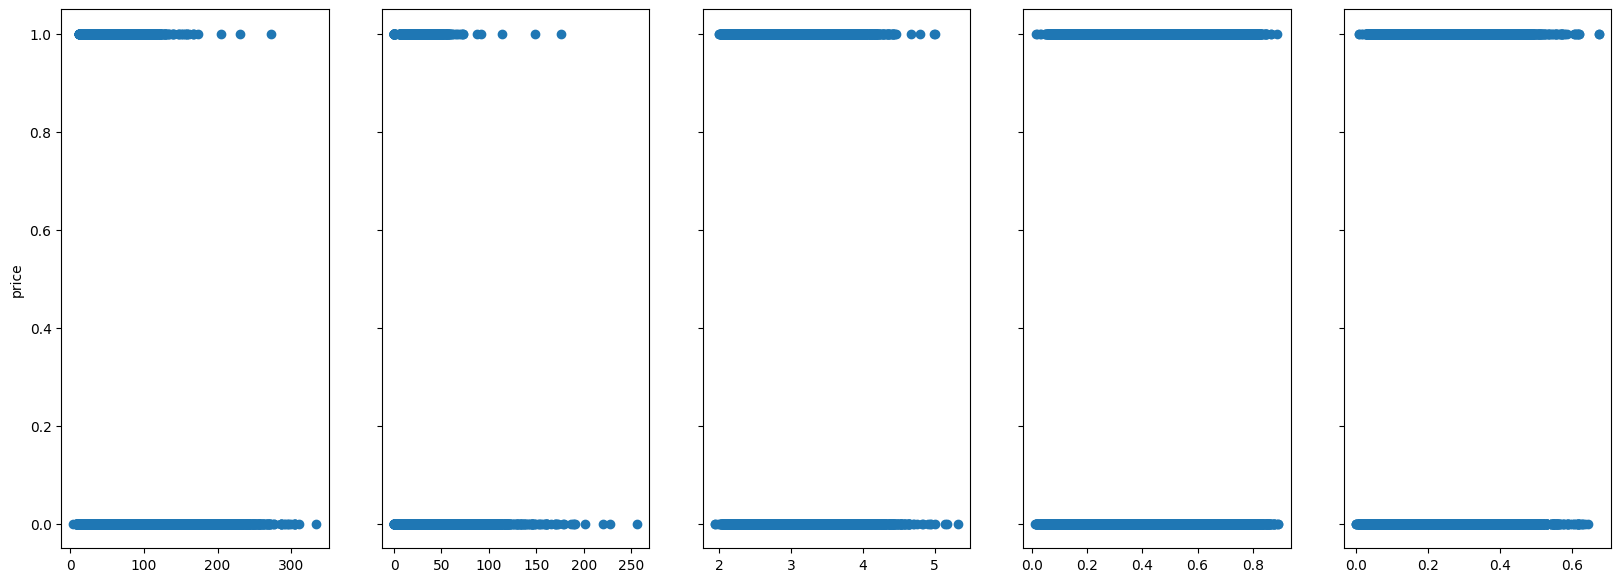

In [29]:
# ploting features before normalization
plot_features(x, y, n_features=5)

In [30]:
# normalize data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [31]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,13376.000000,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,13376.000000,13376.000000,13376.000000,13376.000000,1.337600e+04
mean,0.000000,1.699863e-17,-1.138908e-15,2.974760e-17,1.338642e-16,0.000000,0.000000,0.000000,0.000000,4.249658e-18
std,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037,1.000037,1.000037,1.000037e+00
min,-1.127508,-1.133850e+00,-1.892575e+00,-1.985823e+00,-1.913371e+00,-6.881124,-6.013030,-8.884994,-1.165906,-2.540439e+00
25%,-0.695597,-5.725646e-01,-7.321727e-01,-7.894450e-01,-7.817974e-01,-0.257698,-0.397603,-0.484783,-0.895471,-6.885832e-01
50%,-0.396412,-3.134357e-01,-1.855942e-01,-1.267208e-01,-1.521529e-01,0.158529,0.126236,-0.010683,-0.295185,-2.493378e-02
75%,0.403141,1.177649e-01,5.797416e-01,6.862462e-01,6.507554e-01,0.478232,0.491079,0.465791,0.782802,6.290579e-01
max,5.887093,1.113860e+01,5.214415e+00,2.791003e+00,4.114246e+00,8.909961,4.091646,7.741114,2.170920,3.932278e+00


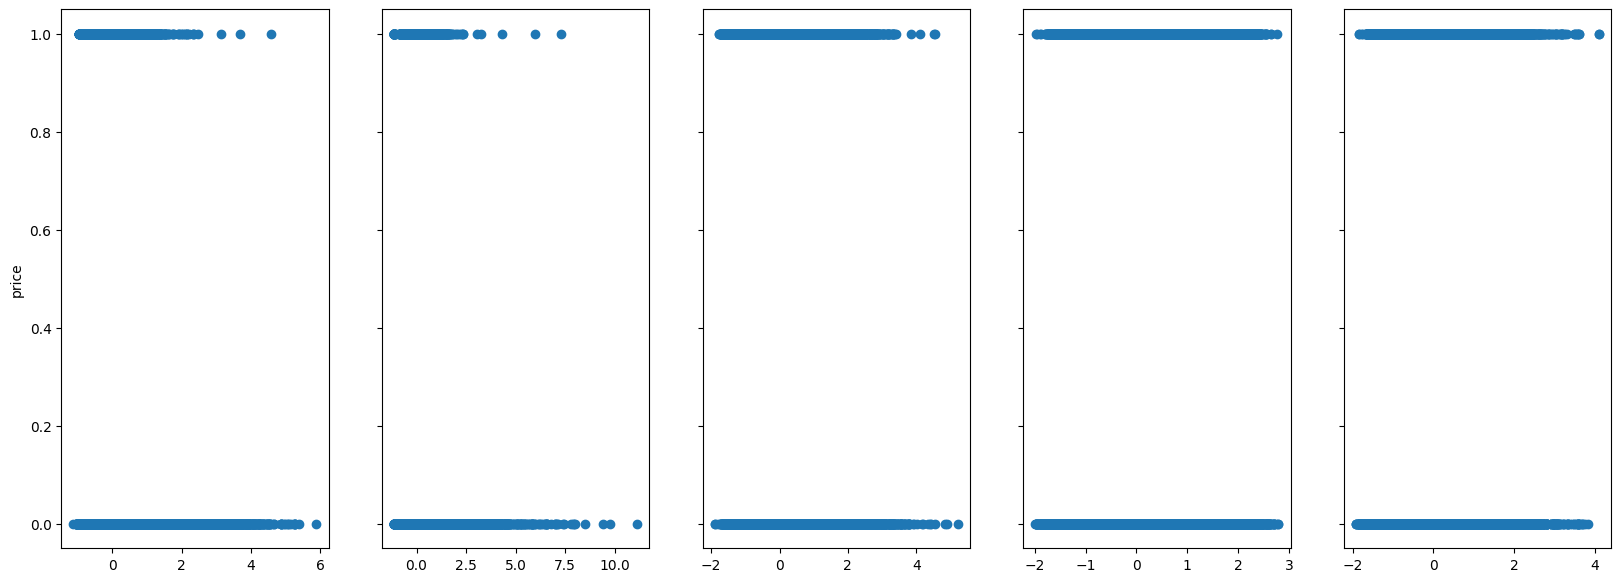

In [32]:
# ploting features after normalization
plot_features(x, y, n_features=5)

In [33]:
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.3, random_state=0)

# Train and Assess Logestic Regression model

In [34]:
model = LogReg()

params = {
    "penalty": [None, "l2"],
    "C": [0.01, 0.1, 1, 10, 50, 100]
}

lg_cv = GridSearchCV(model, param_grid=params, cv=10, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")

In [35]:
lg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'penalty': [None, 'l2']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [36]:
result = pd.DataFrame(lg_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.040829,0.020796,0.013156,0.003813,0.01,None,"{'C': 0.01, 'penalty': None}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749057,0.754319,0.737452,0.750664,0.016704,3
1,0.046324,0.022156,0.011732,0.001235,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.763074,0.792956,0.791889,...,0.734733,0.765873,0.749042,0.719925,0.750000,0.747170,0.735125,0.747764,0.016565,12
2,0.039063,0.016564,0.012219,0.001506,0.1,None,"{'C': 0.1, 'penalty': None}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749057,0.754319,0.737452,0.750664,0.016704,3
3,0.036600,0.008352,0.014238,0.003967,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.743738,0.763419,0.750484,0.724665,0.748593,0.751908,0.738878,0.750820,0.015596,1
4,0.039171,0.008403,0.013564,0.000643,1,None,"{'C': 1, 'penalty': None}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749057,0.754319,0.737452,0.750664,0.016704,3
5,0.039591,0.006270,0.013567,0.001035,1,l2,"{'C': 1, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749529,0.754319,0.737452,0.750711,0.016700,2
6,0.037218,0.006283,0.013195,0.000351,10,None,"{'C': 10, 'penalty': None}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749057,0.754319,0.737452,0.750664,0.016704,3
7,0.033370,0.006812,0.013052,0.000399,10,l2,"{'C': 10, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749057,0.754319,0.737452,0.750664,0.016704,3
8,0.040830,0.009249,0.013187,0.000396,50,None,"{'C': 50, 'penalty': None}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749057,0.754319,0.737452,0.750664,0.016704,3
9,0.067328,0.039197,0.014279,0.001332,50,l2,"{'C': 50, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.738964,0.764356,0.749515,0.723282,0.749057,0.754319,0.737452,0.750664,0.016704,3


In [37]:
selected_results = result[["param_penalty", "param_C", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
selected_results

,param_penalty,param_C,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,None,0.01,0.772826,0.750664,0.785010,0.822804
1,l2,0.01,0.772719,0.747764,0.786165,0.828949
2,None,0.1,0.772826,0.750664,0.785010,0.822804
3,l2,0.1,0.773467,0.750820,0.785772,0.824287
4,None,1,0.772826,0.750664,0.785010,0.822804
5,l2,1,0.772932,0.750711,0.785131,0.823016
6,None,10,0.772826,0.750664,0.785010,0.822804
7,l2,10,0.772826,0.750664,0.785010,0.822804
8,None,50,0.772826,0.750664,0.785010,0.822804
9,l2,50,0.772826,0.750664,0.785010,0.822804


In [38]:
lg_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

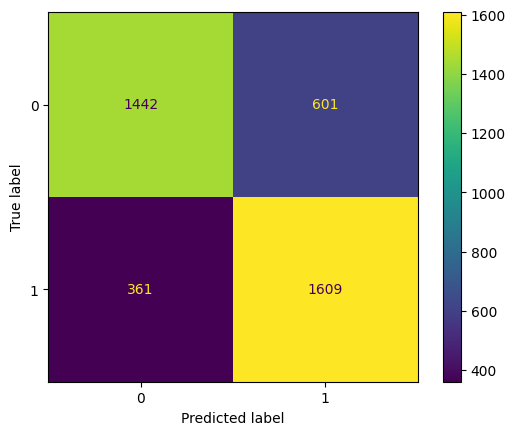

In [39]:
lg_prediction = lg_cv.best_estimator_.predict(x_eval)
m = confusion_matrix(y_eval, lg_prediction)
cm = ConfusionMatrixDisplay(m)
cm.plot()

In [40]:
print(classification_report(y_eval, lg_prediction))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2043
           1       0.73      0.82      0.77      1970

    accuracy                           0.76      4013
   macro avg       0.76      0.76      0.76      4013
weighted avg       0.76      0.76      0.76      4013



# Train and Assess KNN model

In [41]:
knn_model = KNN()

params = {
    "n_neighbors": list(range(3,20,2))
}

knn_cv = GridSearchCV(knn_model, param_grid=params, cv=10, return_train_score=True, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")

In [42]:
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [43]:
knn_result = pd.DataFrame(knn_cv.cv_results_)
knn_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,split2_train_precision,split3_train_precision,split4_train_precision,split5_train_precision,split6_train_precision,split7_train_precision,split8_train_precision,split9_train_precision,mean_train_precision,std_train_precision
0,0.010189,0.000168,0.087015,0.005800,3,{'n_neighbors': 3},0.769477,0.789755,0.808965,0.798077,...,0.858264,0.858882,0.855657,0.856708,0.862519,0.860166,0.857205,0.859569,0.858111,0.002092
1,0.010419,0.000386,0.092096,0.001754,5,{'n_neighbors': 5},0.784418,0.813234,0.823906,0.803419,...,0.826667,0.830081,0.826943,0.819975,0.826773,0.827834,0.829123,0.828098,0.826857,0.002698
2,0.010315,0.000256,0.097045,0.001323,7,{'n_neighbors': 7},0.784418,0.823906,0.818570,0.814103,...,0.810366,0.812265,0.812996,0.808799,0.812917,0.812696,0.813182,0.813730,0.812028,0.001621
3,0.010242,0.000182,0.100318,0.001537,9,{'n_neighbors': 9},0.787620,0.827108,0.821772,0.815171,...,0.798392,0.800664,0.801897,0.798681,0.804631,0.802612,0.801413,0.805297,0.801673,0.002277
4,0.010117,0.000172,0.104526,0.002546,11,{'n_neighbors': 11},0.783351,0.824973,0.828175,0.811966,...,0.794940,0.795670,0.794262,0.794698,0.800041,0.795211,0.796856,0.795814,0.796043,0.001980
5,0.010454,0.000553,0.108257,0.002308,13,{'n_neighbors': 13},0.799360,0.819637,0.829242,0.810897,...,0.792136,0.789732,0.790041,0.788403,0.796178,0.787260,0.792608,0.790033,0.790962,0.002650
6,0.010436,0.000524,0.111404,0.001418,15,{'n_neighbors': 15},0.799360,0.817503,0.836713,0.806624,...,0.786572,0.786675,0.787005,0.785613,0.791998,0.787212,0.790907,0.786596,0.788143,0.002182
7,0.010921,0.000656,0.120054,0.004817,17,{'n_neighbors': 17},0.794023,0.819637,0.834578,0.800214,...,0.785032,0.785714,0.783181,0.785569,0.789721,0.787429,0.786942,0.784413,0.786343,0.002102
8,0.012205,0.001325,0.143705,0.021510,19,{'n_neighbors': 19},0.794023,0.813234,0.836713,0.797009,...,0.781218,0.783729,0.782064,0.781870,0.786542,0.784509,0.784010,0.781377,0.783210,0.001687


In [44]:
knn_selected_results = knn_result[["param_n_neighbors", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
knn_selected_results

,param_n_neighbors,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,3,0.795687,0.766912,0.808552,0.855446
1,5,0.804869,0.768954,0.819172,0.876642
2,7,0.808181,0.769548,0.822929,0.884484
3,9,0.810530,0.770192,0.825578,0.889782
4,11,0.808928,0.767138,0.824724,0.891904
5,13,0.811918,0.768985,0.827627,0.896145
6,15,0.812238,0.768926,0.828038,0.897204
7,17,0.809781,0.766151,0.826126,0.896566
8,19,0.809354,0.765675,0.825738,0.896351


In [45]:
knn_cv.best_params_

{'n_neighbors': 15}

In [46]:
knn_prediction = knn_cv.best_estimator_.predict(x_eval)

print(classification_report(y_eval, knn_prediction))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      2043
           1       0.76      0.90      0.82      1970

    accuracy                           0.81      4013
   macro avg       0.82      0.81      0.81      4013
weighted avg       0.82      0.81      0.81      4013



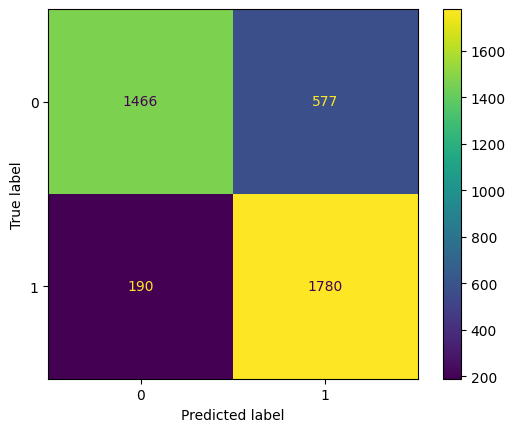

In [47]:
m = confusion_matrix(y_eval, knn_prediction)
p = ConfusionMatrixDisplay(m)
p.plot()